# Imports

In [1]:
from virtualitics import api
import pandas as pd
import numpy as np
import csv

In [2]:
vip = api.VIP()

Setting up WebSocket connection to: ws://localhost:12345/api
Connection Successful! Initializing session.


# Data Generation

In [3]:
FILENAME = 'Data/ClusterData.csv'

def create_cluster(x_loc, x_scale, y_loc, y_scale, z_loc, z_scale, bin, num_points):
    '''
    Creates a gaussian distribution of x, y, and z coordinates with an
    associated binary value. Appends the data of the cluster to the csv
    with FILENAME.
        Args:
            x_loc: Center of the distribution on the x-axis
            x_scale: Standard deviation of x coordinates from the center
            y_loc: Center of the distribution on the y-axis
            y_scale: Standard deviation of y coordinates from the center
            z_loc: Center of the distribution on the z-axis
            z_scale: Standard deviation of z coordinates from the center
            bin: Binary value of data (either 0 or 1)
            num_points: Number of points in the cluster
        Returns:
            None
    '''
    x = np.random.normal(x_loc, x_scale, num_points)
    y = np.random.normal(y_loc, y_scale, num_points)
    z = np.random.normal(z_loc, z_scale, num_points)
    with open(FILENAME, mode = 'a', newline='') as f:
        data_writer = csv.writer(f)
        for i in range(len(x)):
            data_writer.writerow([x[i], y[i], z[i], bin])

def create_file():
    '''
    Creates a csv file with FILENAME. Writes the first line with the
    data names of the csv. Makes calls to create_cluster to generate
    the rest of the data
        Args:
            None.
        Returns:
            None.
    '''
    with open(FILENAME, mode = 'w', newline='') as f:
        data_writer = csv.writer(f)
        data_writer.writerow(['x_coordinates', 'y_coordinates', 'z_coordinates', 'bin'])
    # Creates 9 clusters that follow the shape of the vertices of a cube with
    # another cluster in the middle all with bin value 1. Total 10,000 points.
    create_cluster(0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1, 1000)
    create_cluster(10.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1, 1000)
    create_cluster(0.0, 1.0, 10.0, 1.0, 0.0, 1.0, 1, 1000)
    create_cluster(10.0, 1.0, 10.0, 1.0, 0.0, 1.0, 1, 1000)
    create_cluster(0.0, 1.0, 0.0, 1.0, 10.0, 1.0, 1, 1000)
    create_cluster(10.0, 1.0, 0.0, 1.0, 10.0, 1.0, 1, 1000)
    create_cluster(0.0, 1.0, 10.0, 1.0, 10.0, 1.0, 1, 1000)
    create_cluster(10.0, 1.0, 10.0, 1.0, 10.0, 1.0, 1, 1000)
    create_cluster(5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 1, 2000)
    # Creates 10,000 points normally distributed throughtout the plot to
    # obscure the above clusters with bin value 0.
    create_cluster(5.0, 10.0, 5.0, 10.0, 5.0, 10.0, 0, 10000)

def main():
    create_file()

main()

In [4]:
data = pd.read_csv(r"C:\Users\sstam\OneDrive\Desktop\VRSummer2019\Data\ClusterData.csv")
vip.load_data(data, "Generated Data")
data.describe(include='all')

,x_coordinates,y_coordinates,z_coordinates,bin
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.971100,4.928237,5.034237,0.500000
std,7.749513,7.823326,7.833555,0.500013
min,-34.059455,-27.323524,-33.303859,0.000000
25%,-0.035930,-0.084670,-0.032022,0.000000
50%,4.981966,4.991357,5.041676,0.500000
75%,10.038542,10.007718,10.064171,1.000000
max,39.982118,46.018290,46.122799,1.000000


# 2D Plot

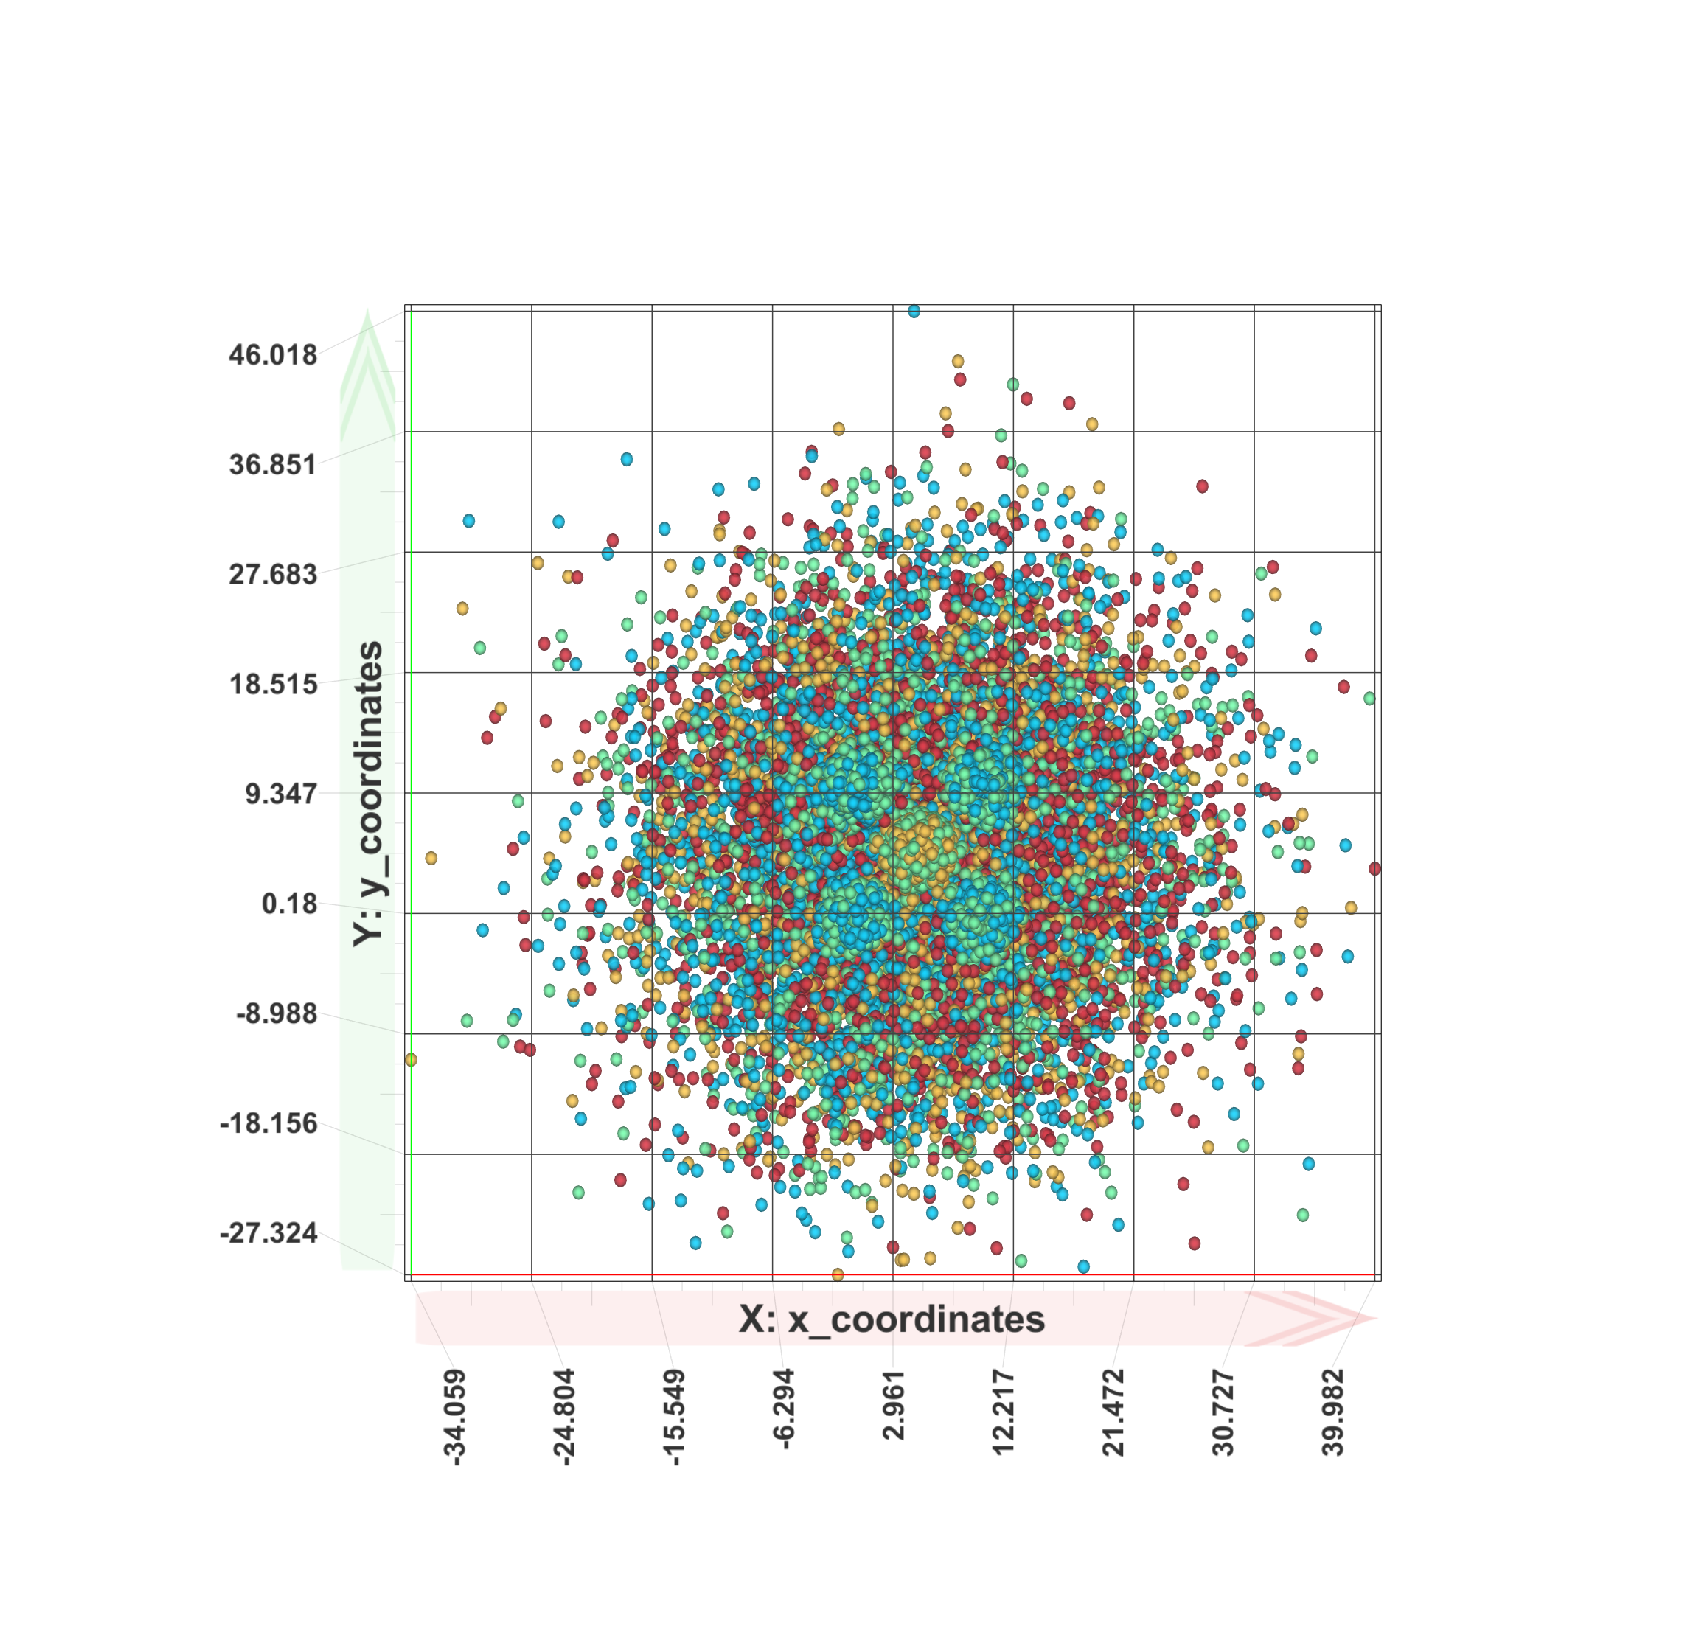

In [5]:
vip.plot(plot_type="scatter", x="x_coordinates", y="y_coordinates", color="z_coordinates")

# Unformatted 3D Plot

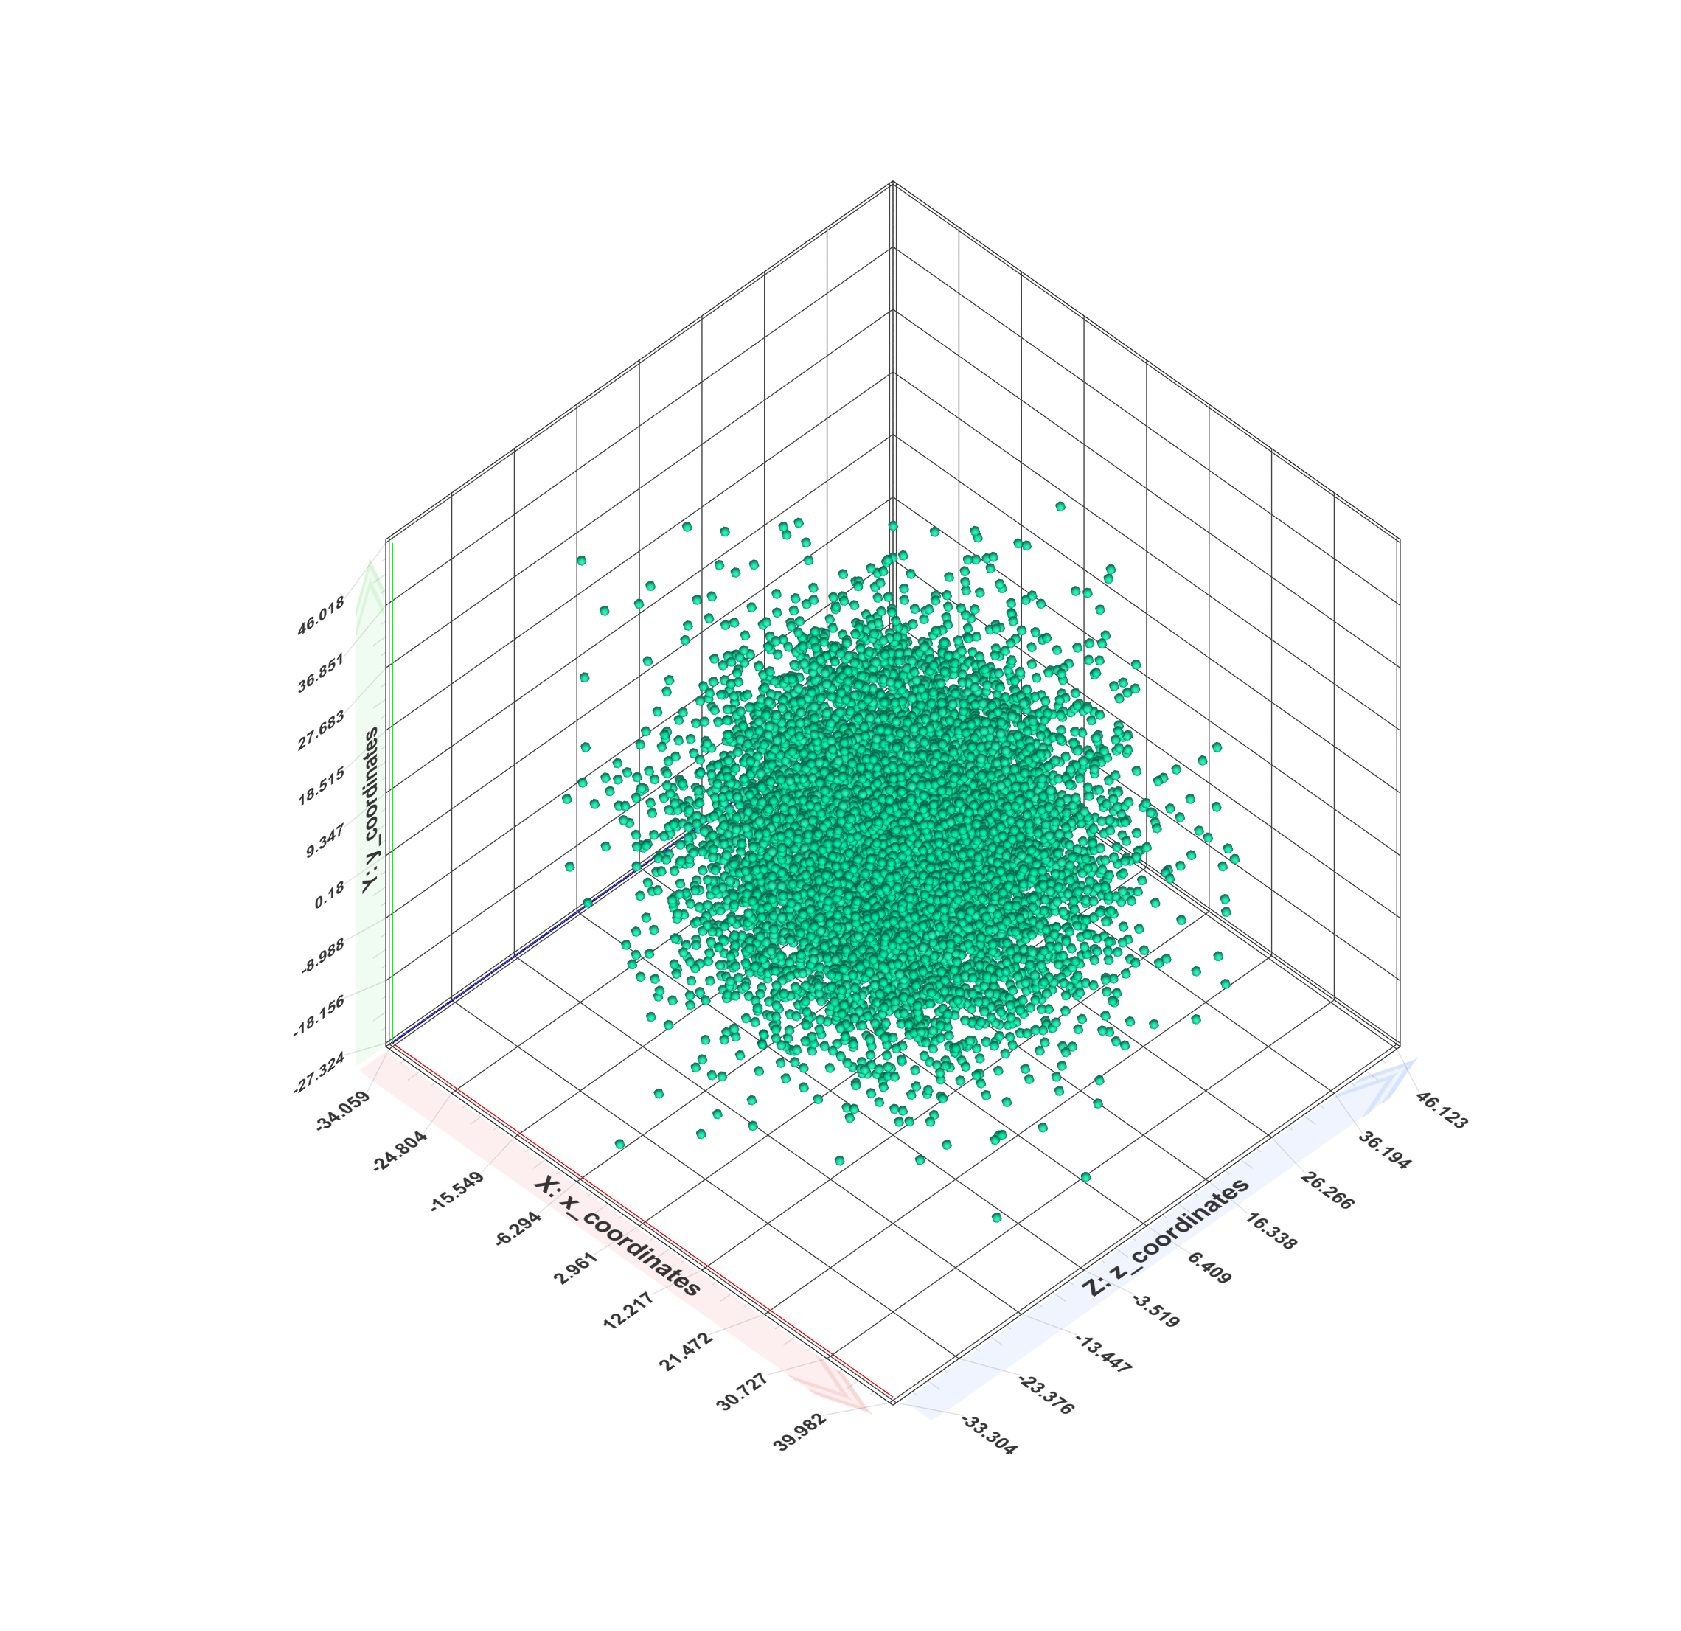

In [6]:
vip.plot(plot_type="scatter", x="x_coordinates", y="y_coordinates", z="z_coordinates")

# Fomatted 3D Plot

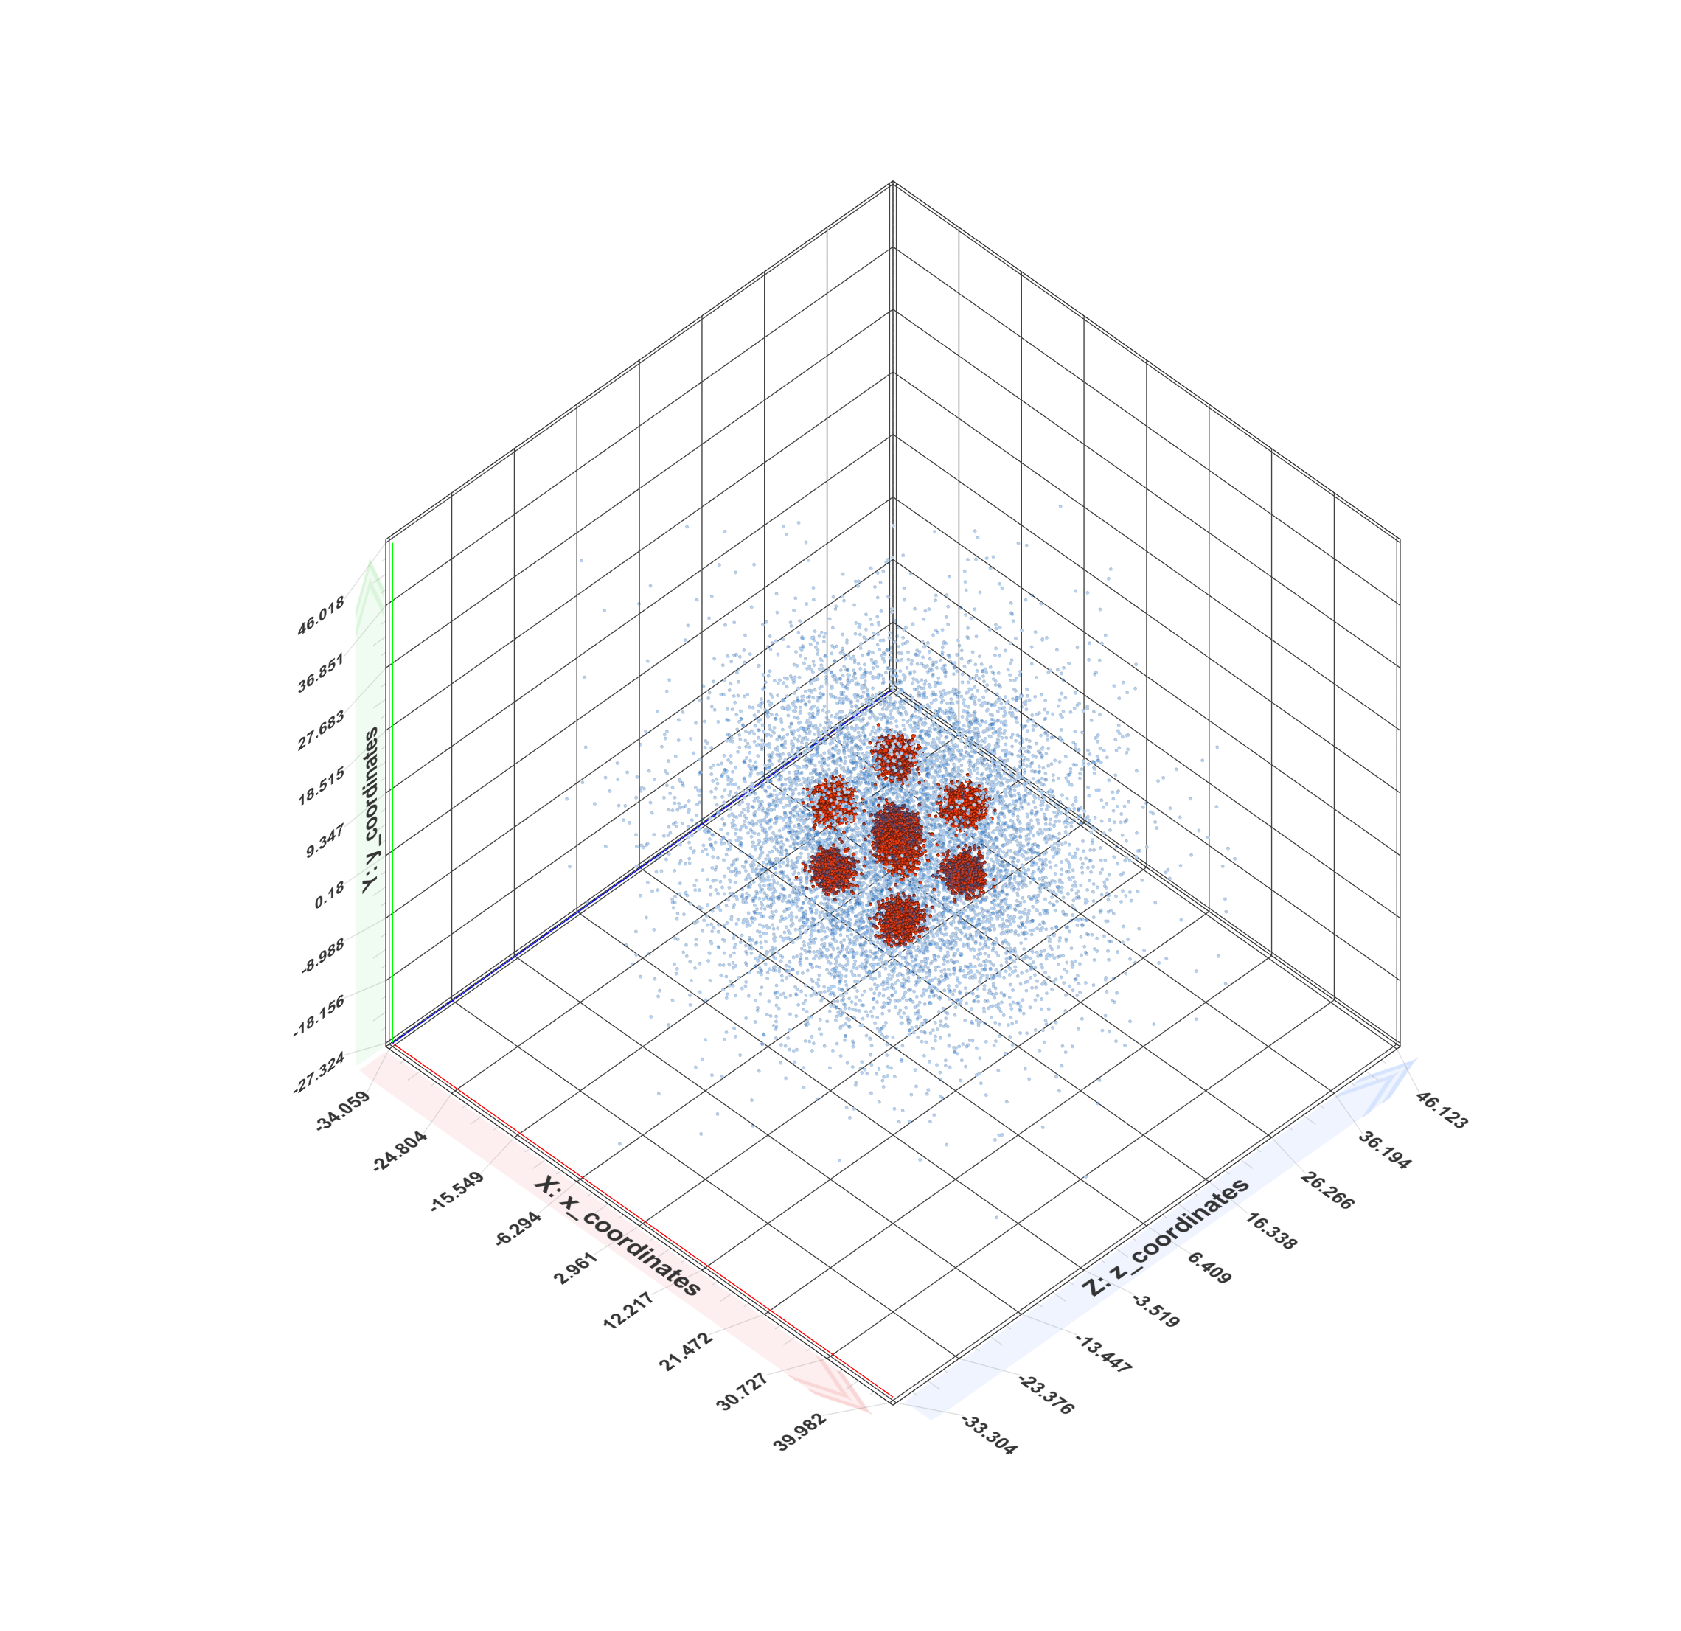

In [7]:
vip.plot(plot_type="scatter", x="x_coordinates", y="y_coordinates", z="z_coordinates", color="bin",\
         transparency="bin", size_scale=0.6)